In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [117]:
start = "2019-04-05"
end = "2024-04-05"

aapl = yf.download("AAPL", start, end)
samsung = yf.download("005930.KS", start, end)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [118]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-05,49.112499,49.275002,48.982498,49.250000,47.412922,74106400
2019-04-08,49.105000,50.057499,49.084999,50.025002,48.159016,103526800
2019-04-09,50.080002,50.712502,49.807499,49.875000,48.014603,143072800
2019-04-10,49.669998,50.185001,49.544998,50.154999,48.284157,86781200
2019-04-11,50.212502,50.250000,49.610001,49.737499,47.882236,83603200
...,...,...,...,...,...,...
2024-03-28,171.750000,172.229996,170.509995,171.479996,171.479996,65672700
2024-04-01,171.190002,171.250000,169.479996,170.029999,170.029999,46240500
2024-04-02,169.080002,169.339996,168.229996,168.839996,168.839996,49329500


In [119]:
samsung


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-05,46950.0,47550.0,46600.0,46850.0,41157.742188,8546339
2019-04-08,47250.0,47250.0,46150.0,46650.0,40982.039062,8507909
2019-04-09,46700.0,46950.0,46200.0,46650.0,40982.039062,6878761
2019-04-10,46400.0,46700.0,46050.0,46700.0,41025.960938,11883995
2019-04-11,46700.0,46800.0,46150.0,46250.0,40630.636719,13697399
...,...,...,...,...,...,...
2024-03-29,81200.0,82500.0,80900.0,82400.0,82400.000000,27126366
2024-04-01,83200.0,83300.0,82000.0,82000.0,82000.000000,20116513
2024-04-02,82900.0,85000.0,82900.0,85000.0,85000.000000,37077944


Apple Data Cleaning

In [120]:
aapl.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [121]:
aapl.shape

(1258, 6)

In [122]:
# Handling outliers in the Close Column

z_scores = (aapl['Close'] - aapl['Close'].mean()) / aapl['Close'].std()

outliers = z_scores.abs() > 3

aapl = aapl[~outliers]

aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-05,49.112499,49.275002,48.982498,49.250000,47.412922,74106400
2019-04-08,49.105000,50.057499,49.084999,50.025002,48.159016,103526800
2019-04-09,50.080002,50.712502,49.807499,49.875000,48.014603,143072800
2019-04-10,49.669998,50.185001,49.544998,50.154999,48.284157,86781200
2019-04-11,50.212502,50.250000,49.610001,49.737499,47.882236,83603200
...,...,...,...,...,...,...
2024-03-28,171.750000,172.229996,170.509995,171.479996,171.479996,65672700
2024-04-01,171.190002,171.250000,169.479996,170.029999,170.029999,46240500
2024-04-02,169.080002,169.339996,168.229996,168.839996,168.839996,49329500


In [123]:
aapl.shape

(1258, 6)

In [124]:
# Checking aapl consistency in column headers and aapl types
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-04-05 to 2024-04-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [125]:
aapl['Daily Return Percentage'] = aapl['Adj Close'].pct_change()

In [126]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return Percentage
Date,,,,,,,
2019-04-05,49.112499,49.275002,48.982498,49.250000,47.412922,74106400,NaN
2019-04-08,49.105000,50.057499,49.084999,50.025002,48.159016,103526800,0.015736
2019-04-09,50.080002,50.712502,49.807499,49.875000,48.014603,143072800,-0.002999
2019-04-10,49.669998,50.185001,49.544998,50.154999,48.284157,86781200,0.005614
2019-04-11,50.212502,50.250000,49.610001,49.737499,47.882236,83603200,-0.008324


In [127]:
# Remove NaN value in first row for Weekly Return
aapl.dropna(subset=['Daily Return Percentage'], inplace=True)

In [128]:
aapl['Price Range'] = aapl['High'] - aapl['Low']

In [129]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return Percentage,Price Range
Date,,,,,,,,
2019-04-08,49.105000,50.057499,49.084999,50.025002,48.159016,103526800,0.015736,0.972500
2019-04-09,50.080002,50.712502,49.807499,49.875000,48.014603,143072800,-0.002999,0.905003
2019-04-10,49.669998,50.185001,49.544998,50.154999,48.284157,86781200,0.005614,0.640003
2019-04-11,50.212502,50.250000,49.610001,49.737499,47.882236,83603200,-0.008324,0.639999
2019-04-12,49.799999,50.035000,49.052502,49.717499,47.862976,111042800,-0.000402,0.982498


Samsung Data Cleaning

In [130]:
samsung.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [131]:
samsung.shape

(1233, 6)

In [132]:
# Handling outliers in the Close Column

z_scores = (samsung['Close'] - samsung['Close'].mean()) / samsung['Close'].std()

outliers = z_scores.abs() > 3

samsung = samsung[~outliers]

samsung

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-05,46950.0,47550.0,46600.0,46850.0,41157.742188,8546339
2019-04-08,47250.0,47250.0,46150.0,46650.0,40982.039062,8507909
2019-04-09,46700.0,46950.0,46200.0,46650.0,40982.039062,6878761
2019-04-10,46400.0,46700.0,46050.0,46700.0,41025.960938,11883995
2019-04-11,46700.0,46800.0,46150.0,46250.0,40630.636719,13697399
...,...,...,...,...,...,...
2024-03-29,81200.0,82500.0,80900.0,82400.0,82400.000000,27126366
2024-04-01,83200.0,83300.0,82000.0,82000.0,82000.000000,20116513
2024-04-02,82900.0,85000.0,82900.0,85000.0,85000.000000,37077944


In [133]:
samsung.shape

(1233, 6)

In [134]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1233 entries, 2019-04-05 to 2024-04-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1233 non-null   float64
 1   High       1233 non-null   float64
 2   Low        1233 non-null   float64
 3   Close      1233 non-null   float64
 4   Adj Close  1233 non-null   float64
 5   Volume     1233 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.4 KB


In [135]:
samsung.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-05,46950.0,47550.0,46600.0,46850.0,41157.742188,8546339
2019-04-08,47250.0,47250.0,46150.0,46650.0,40982.039062,8507909
2019-04-09,46700.0,46950.0,46200.0,46650.0,40982.039062,6878761
2019-04-10,46400.0,46700.0,46050.0,46700.0,41025.960938,11883995
2019-04-11,46700.0,46800.0,46150.0,46250.0,40630.636719,13697399


In [136]:
# Converting KRW to USD for Samsung Stock

samsung['Open'] = samsung['Open'] * (0.00074)
samsung['High'] = samsung['High'] * (0.00074)
samsung['Low'] = samsung['Low'] * (0.00074)
samsung['Close'] = samsung['Close'] * (0.00074)
samsung['Adj Close'] = samsung['Adj Close'] * (0.00074)

samsung

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-05,34.743,35.187,34.484,34.669,30.456729,8546339
2019-04-08,34.965,34.965,34.151,34.521,30.326709,8507909
2019-04-09,34.558,34.743,34.188,34.521,30.326709,6878761
2019-04-10,34.336,34.558,34.077,34.558,30.359211,11883995
2019-04-11,34.558,34.632,34.151,34.225,30.066671,13697399
...,...,...,...,...,...,...
2024-03-29,60.088,61.050,59.866,60.976,60.976000,27126366
2024-04-01,61.568,61.642,60.680,60.680,60.680000,20116513
2024-04-02,61.346,62.900,61.346,62.900,62.900000,37077944


In [140]:
samsung['Daily Return Percentage'] = samsung['Adj Close'].pct_change()

In [141]:
samsung['Price Range'] = samsung['High'] - samsung['Low']


In [142]:
samsung.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return Percentage,Price Range
Date,,,,,,,,
2019-04-05,34.743,35.187,34.484,34.669,30.456729,8546339,NaN,0.703
2019-04-08,34.965,34.965,34.151,34.521,30.326709,8507909,-0.004269,0.814
2019-04-09,34.558,34.743,34.188,34.521,30.326709,6878761,0.000000,0.555
2019-04-10,34.336,34.558,34.077,34.558,30.359211,11883995,0.001072,0.481
2019-04-11,34.558,34.632,34.151,34.225,30.066671,13697399,-0.009636,0.481


Exploratory Data Analysis

In [146]:
# Describe numerical data for Apple & Samsung stock

aapl.describe()
samsung.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily Return Percentage,Price Range
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1.233000e+03,1232.000000,1233.000000
mean,47.735672,48.144352,47.303105,47.706714,45.225482,1.589854e+07,0.000714,0.841247
std,8.614081,8.655629,8.565450,8.600200,9.130647,8.455985e+06,0.015672,0.474273
min,30.562000,31.117000,30.229000,30.488000,26.783716,0.000000e+00,-0.063877,0.000000
25%,41.440000,41.958000,41.070000,41.366000,37.989790,1.091924e+07,-0.009094,0.518000
50%,48.100000,48.470000,47.730000,48.026000,46.362292,1.424530e+07,0.000000,0.740000
75%,54.242000,54.612000,53.872000,54.168000,53.001436,1.899951e+07,0.008591,0.999000
max,66.822000,71.632000,66.230000,67.340000,63.220651,9.030618e+07,0.104706,5.402000


In [147]:
aapl.info()
samsung.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2019-04-08 to 2024-04-04
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Open                     1257 non-null   float64
 1   High                     1257 non-null   float64
 2   Low                      1257 non-null   float64
 3   Close                    1257 non-null   float64
 4   Adj Close                1257 non-null   float64
 5   Volume                   1257 non-null   int64  
 6   Daily Return Percentage  1257 non-null   float64
 7   Price Range              1257 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 88.4 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1233 entries, 2019-04-05 to 2024-04-04
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Open                     1233 non-null   float64

  Plotting Closing Time Series

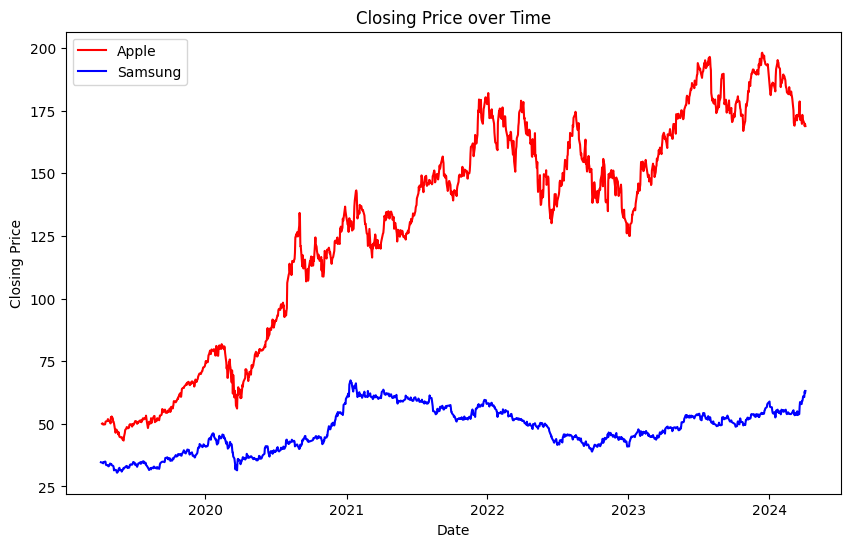

In [150]:
plt.figure(figsize=(10,6))
plt.plot(aapl.index, aapl['Close'], color='red', label='Apple')
plt.plot(samsung.index, samsung['Close'], color='blue', label='Samsung')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price over Time')
plt.legend()
plt.show()

In [154]:
# Grabbing data for 2023-2024 only

aapl_dates_2023_2024 = aapl[(aapl.index.year == 2023) | (aapl.index.year == 2024)]
aapl_close_2023_2024 = aapl[(aapl.index.year == 2023) | (aapl.index.year == 2024)]['Close']

samsung_dates_2023_2024 = samsung[(samsung.index.year == 2023) | (samsung['Date'].index.year == 2024)]['Date']
samsung_close_2023_2024 = samsung[(samsung.index.year == 2023) | (samsung['Date'].index.year == 2024)]['Close']

KeyError: 'Date'

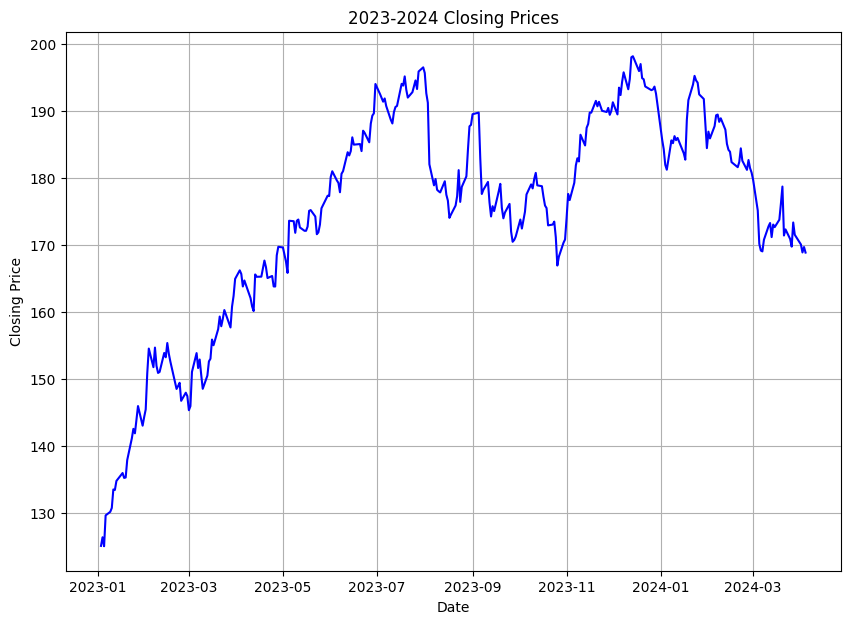

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(dates_2023_2024, close_2023_2024, color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('2023-2024 Closing Prices')
plt.grid()
plt.show()

In [ ]:
aapl['SMA_50'] = aapl['Close'].rolling(window=50).mean()
aapl['SMA_50']

aapl['SMA_100'] = aapl['Close'].rolling(window=100).mean()
aapl['SMA_100']

aapl['SMA_200'] = aapl['Close'].rolling(window=200).mean()
aapl['SMA_200']

1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
          ...    
1254    183.52095
1255    183.45455
1256    183.37900
1257    183.29720
1258    183.21670
Name: SMA_200, Length: 1258, dtype: float64

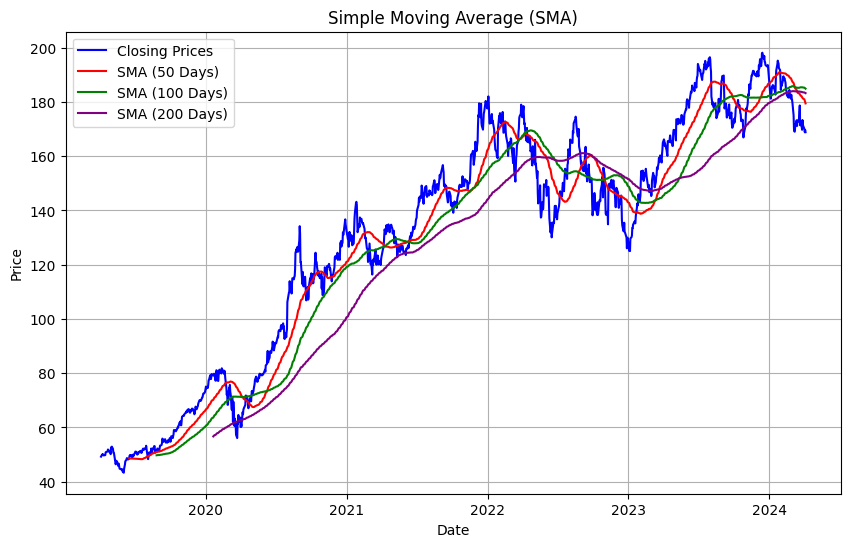

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(aapl['Date'], aapl['Close'], color='blue', label='Closing Prices')
plt.plot(aapl['Date'], aapl['SMA_50'], color='red', label='SMA (50 Days)')
plt.plot(aapl['Date'], aapl['SMA_100'], color='green', label='SMA (100 Days)')
plt.plot(aapl['Date'], aapl['SMA_200'], color='purple', label='SMA (200 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Simple Moving Average (SMA)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
SMA_14_2023_2024 = aapl[(aapl['Date'].dt.year == 2023) | (aapl['Date'].dt.year == 2024)]['Close'].rolling(window=14).mean()

SMA_30_2023_2024 = aapl[(aapl['Date'].dt.year == 2023) | (aapl['Date'].dt.year == 2024)]['Close'].rolling(window=30).mean()

SMA_90_2023_2024 = aapl[(aapl['Date'].dt.year == 2023) | (aapl['Date'].dt.year == 2024)]['Close'].rolling(window=90).mean()

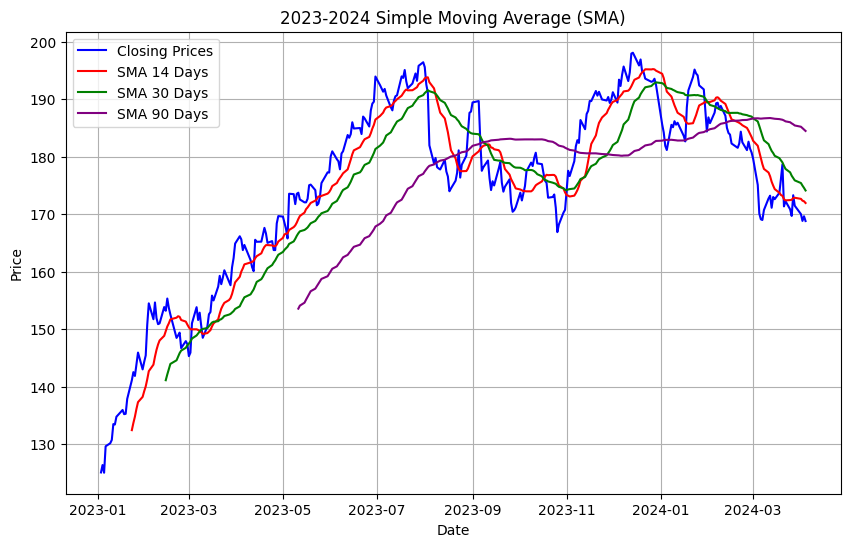

In [ ]:
# Plotting SMA for 30 Days
plt.figure(figsize=(10, 6))
plt.plot(dates_2023_2024, close_2023_2024, color='blue', label='Closing Prices')
plt.plot(dates_2023_2024, SMA_14_2023_2024, color='red', label='SMA 14 Days')
plt.plot(dates_2023_2024, SMA_30_2023_2024, color='green', label='SMA 30 Days')
plt.plot(dates_2023_2024, SMA_90_2023_2024, color='purple', label='SMA 90 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2023-2024 Simple Moving Average (SMA)')
plt.legend()
plt.grid(True)
plt.show()

Relative Strength Index

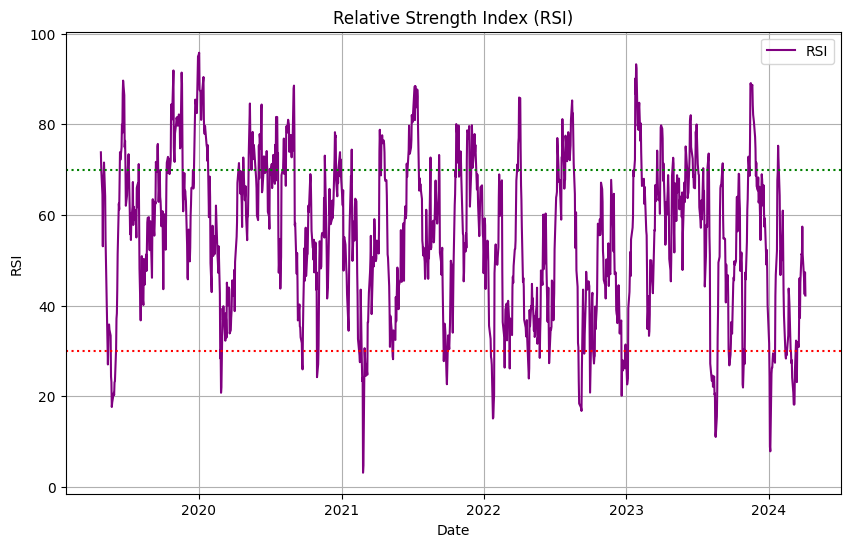

In [ ]:

def calculate_rsi(aapl, window=14):
    # Calculate price changes
    delta = aapl['Close'].diff(1)
    
    # Separate gains (positive changes) and losses (negative changes)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    
    # Calculate RS (Relative Strength)
    rs = gain / loss
    
    # Calculate RSI (Relative Strength Index)
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Assuming 'aapl' is your aaplFrame containing historical stock price aapl
aapl['RSI'] = calculate_rsi(aapl)

# Plot RSI
plt.figure(figsize=(10, 6))
plt.plot(aapl['Date'], aapl['RSI'], color='purple', label='RSI')
plt.axhline(y=70, color='green', linestyle=':')
plt.axhline(y=30, color='red', linestyle=':')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.grid(True)
plt.show()


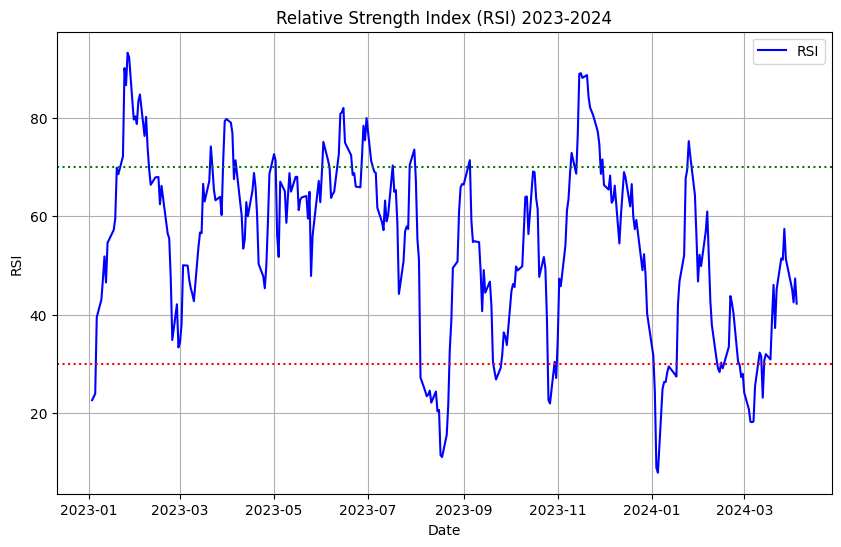

In [ ]:
# Plot RSI 2023-2024
plt.figure(figsize=(10, 6))
plt.plot(dates_2023_2024, aapl[(aapl['Date'].dt.year == 2023) | (aapl['Date'].dt.year == 2024)]['RSI'], color='blue', label='RSI')
plt.axhline(y=70, color='green', linestyle=':')
plt.axhline(y=30, color='red', linestyle=':')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI) 2023-2024')
plt.legend()
plt.grid(True)
plt.show()

Visualizing Daily Return

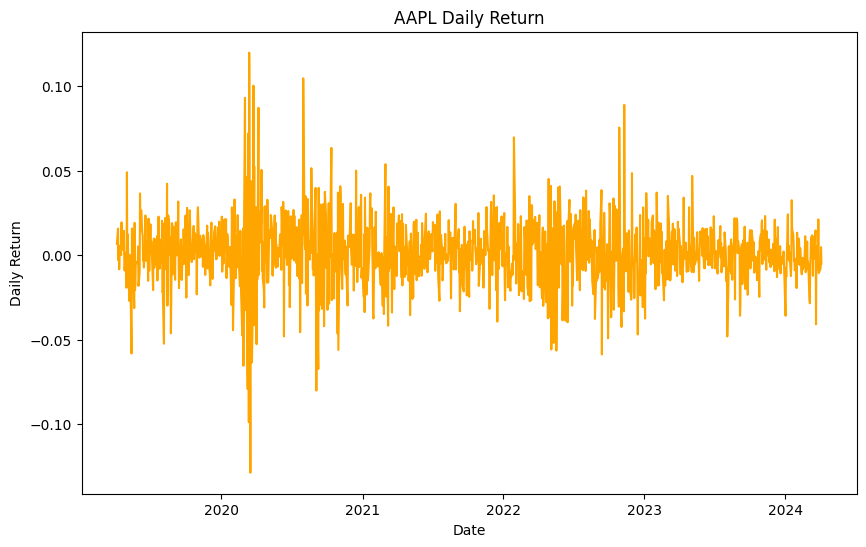

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(aapl['Date'], aapl['Daily Return Percentage'], color='orange')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('AAPL Daily Return')
plt.show()

Daily Returns for 2023-2024

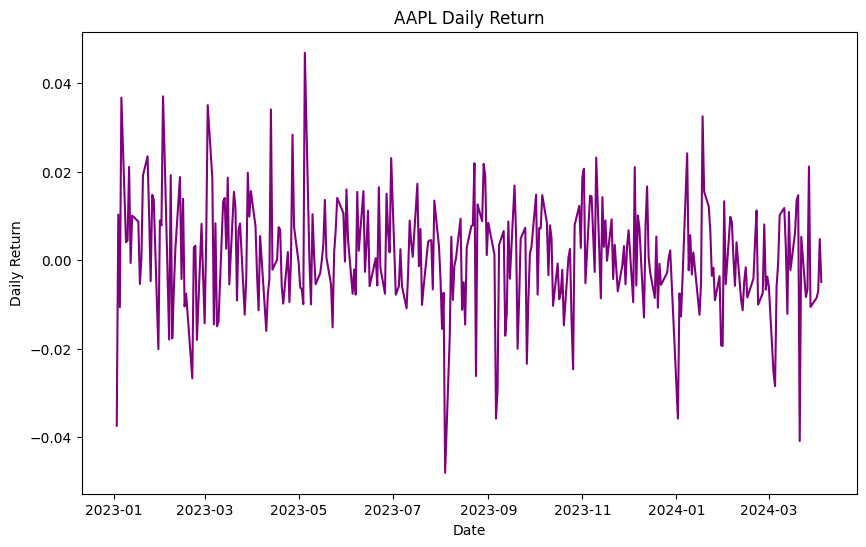

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dates_2023_2024, aapl[(aapl['Date'].dt.year == 2023) | (aapl['Date'].dt.year == 2024)]['Daily Return Percentage'], color='purple')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('AAPL Daily Return')
plt.show()

Volatility Daily Return

In [ ]:
aapl['Volatility'] = aapl['Daily Return Percentage'].rolling(window=30).std() * np.sqrt(30)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


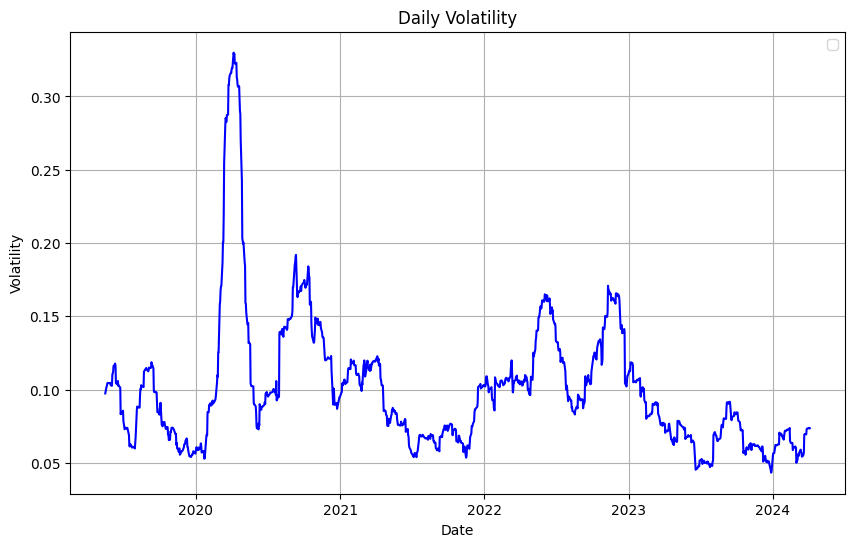

In [ ]:
# Plot volatility
plt.figure(figsize=(10, 6))
plt.plot(aapl['Date'], aapl['Volatility'], color='blue')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Daily Volatility')
plt.legend()
plt.grid(True)
plt.show()


Volatility 2023-2024

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


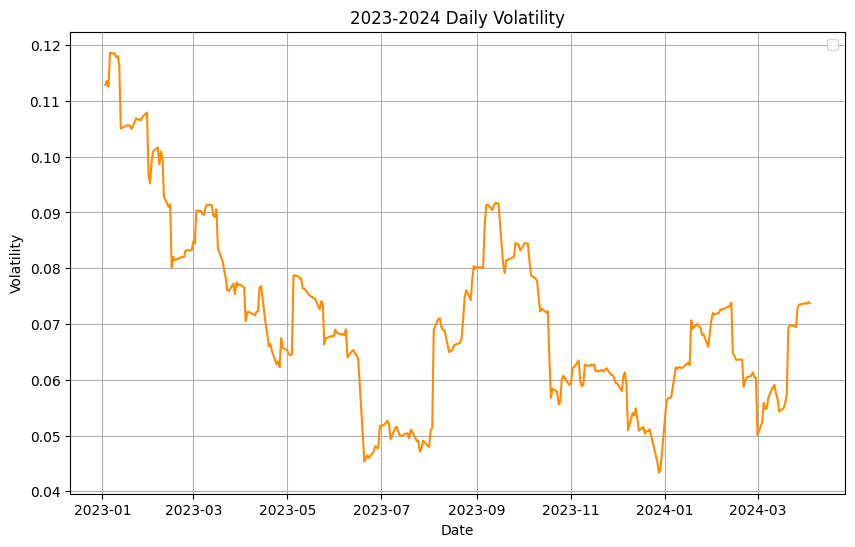

In [ ]:
# Plot volatility
plt.figure(figsize=(10, 6))
plt.plot(dates_2023_2024, aapl[(aapl['Date'].dt.year == 2023) | (aapl['Date'].dt.year == 2024)]['Volatility'], color='darkorange')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('2023-2024 Daily Volatility')
plt.legend()
plt.grid(True)
plt.show()
